In [337]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [338]:
# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [339]:
# Read the file
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [340]:
# Display first 5 rows
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [341]:
# Check dataset size
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 2235
Number of columns: 13


In [342]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [343]:
# Quick look at numerical columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0


In [344]:
# Quick look at categorical columns
df.describe(include=[object]).T

,count,unique,top,freq
Cinsiyet,2066,2,Kadın,1274
KanGrubu,1560,8,0 Rh+,579
Uyruk,2235,5,Türkiye,2173
KronikHastalik,1624,220,Myastenia gravis,38
Bolum,2224,10,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045
Alerji,1291,38,Polen,198
Tanilar,2160,367,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",149
TedaviAdi,2235,244,Dorsalji -Boyun+trapez,231
TedaviSuresi,2235,23,15 Seans,1670
UygulamaYerleri,2014,37,Bel,528


In [345]:
# Missing values count
df.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

In [346]:
# Missing value percentages
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Alerji             42.237136
KanGrubu           30.201342
KronikHastalik     27.337808
UygulamaYerleri     9.888143
Cinsiyet            7.561521
Tanilar             3.355705
Bolum               0.492170
HastaNo             0.000000
Yas                 0.000000
Uyruk               0.000000
TedaviAdi           0.000000
TedaviSuresi        0.000000
UygulamaSuresi      0.000000
dtype: float64

<Axes: >

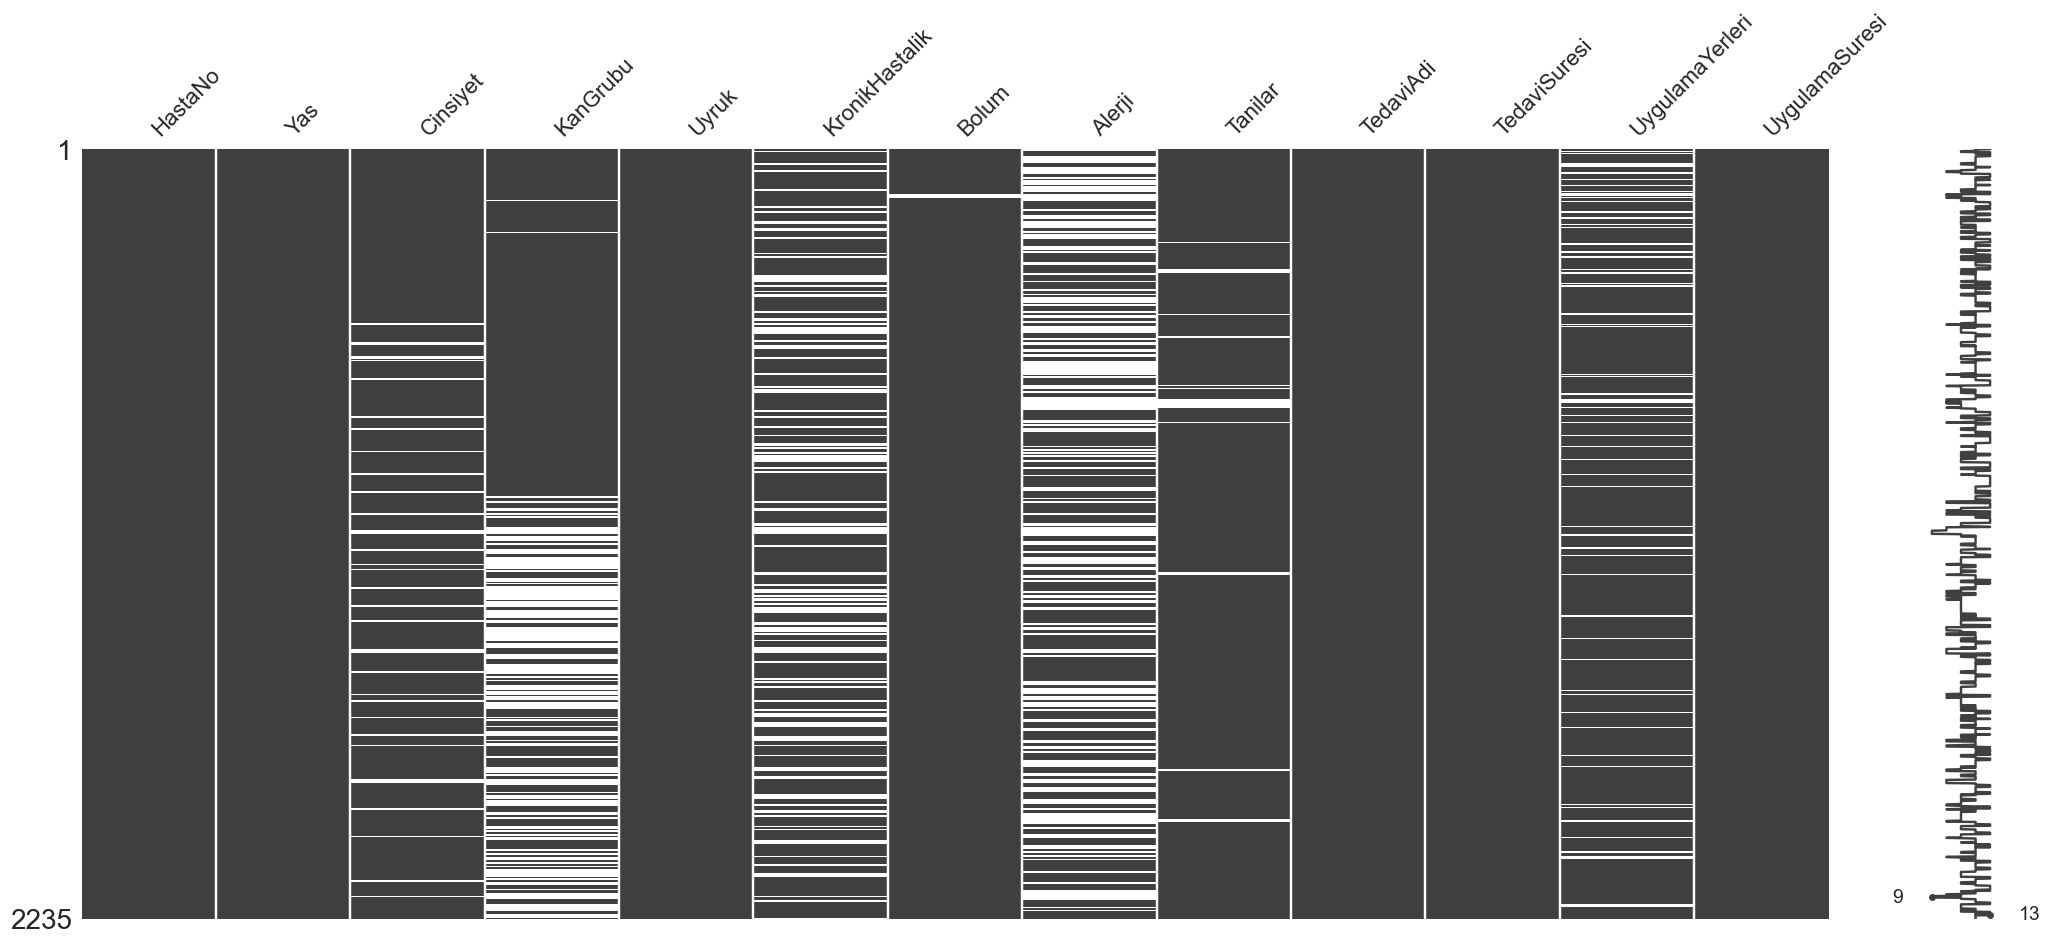

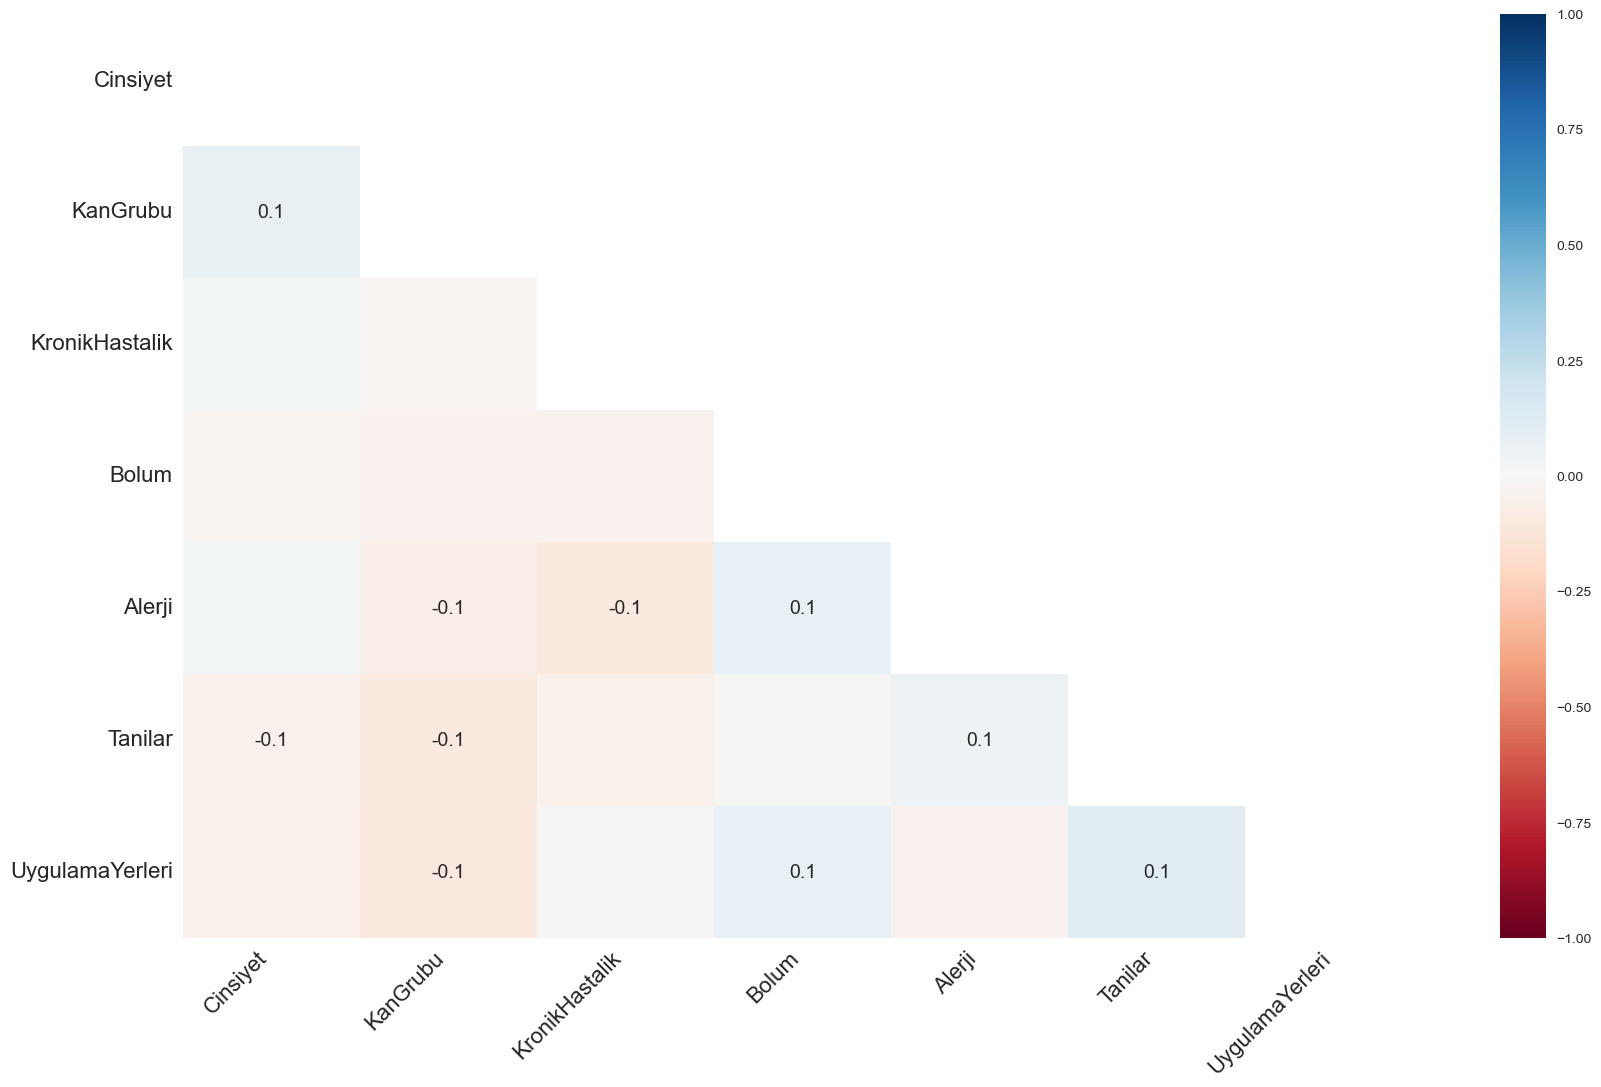

In [347]:
# Visualize missing values
msno.matrix(df)
msno.heatmap(df)

In [348]:
# Check duplicated rows
df.duplicated().sum()

928

In [349]:
# Check duplicates based on specific columns
df.duplicated(subset=["HastaNo", "TedaviAdi", "UygulamaYerleri","UygulamaSuresi"]).sum()

1060

In [350]:
# Identify duplicate rows
dup_rows = df[df.duplicated(subset=["HastaNo", "TedaviAdi", "UygulamaYerleri","UygulamaSuresi"], keep=False)]
dup_rows

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,145535,52,Kadın,NaN,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",POLEN,Omuzun darbe sendromu,Sol omuz İmpingement,15 Seans,Sol Omuz Bölgesi,20 Dakika
2227,145535,52,Kadın,NaN,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",POLEN,Omuzun darbe sendromu,Sol omuz İmpingement,15 Seans,Sol Omuz Bölgesi,20 Dakika
2228,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2229,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika


In [351]:
# Convert treatment duration (target variable) to numeric
df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract(r"(\d+)").astype(float)

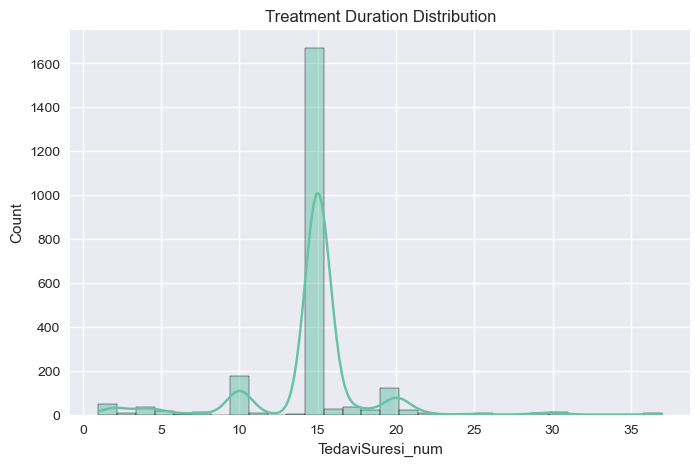

In [352]:
# Visualize distribution
plt.figure(figsize=(8,5))
sns.histplot(df["TedaviSuresi_num"], bins=30, kde=True)
plt.title("Treatment Duration Distribution")
plt.show()

In [353]:
# Statistical summary of target variable
df["TedaviSuresi_num"].describe()

count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi_num, dtype: float64

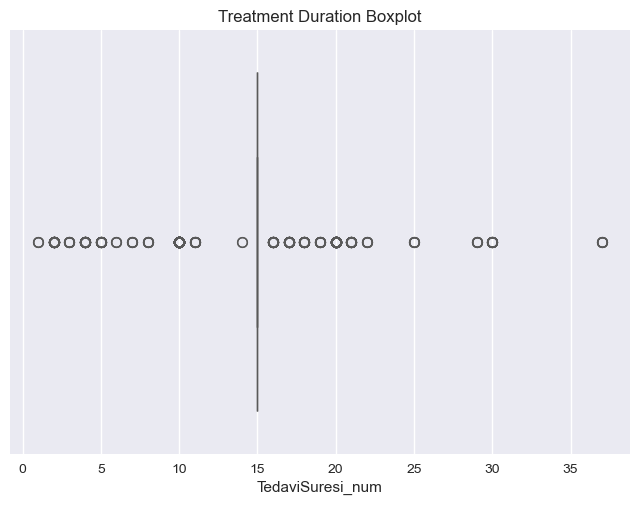

In [354]:
# Boxplot
sns.boxplot(x=df["TedaviSuresi_num"])
plt.title("Treatment Duration Boxplot")
plt.show()

In [355]:
# Convert application duration to numeric
df["UygulamaSuresi_num"] = df["UygulamaSuresi"].str.extract(r"(\d+)").astype(float)

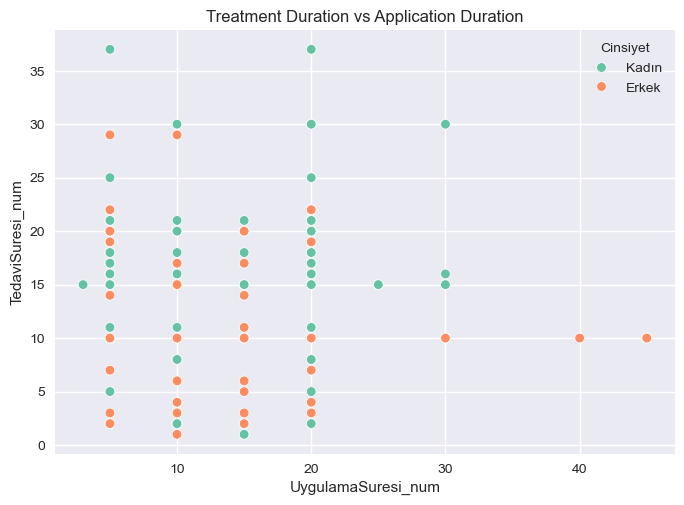

In [356]:
# Scatter plot: Treatment duration vs Application duration
sns.scatterplot(data=df, x="UygulamaSuresi_num", y="TedaviSuresi_num", hue="Cinsiyet")
plt.title("Treatment Duration vs Application Duration")
plt.show()

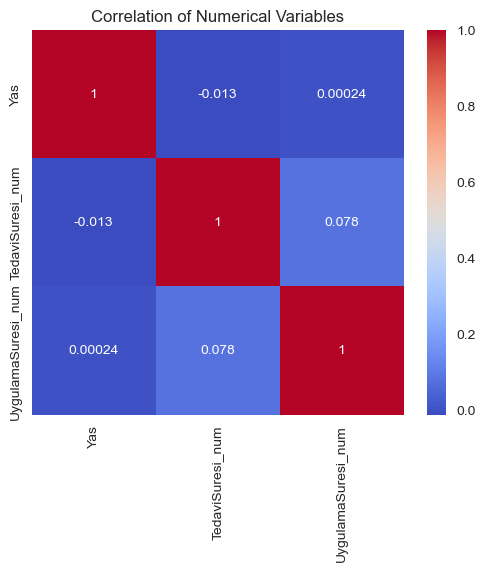

In [357]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Yas","TedaviSuresi_num","UygulamaSuresi_num"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Numerical Variables")
plt.show()

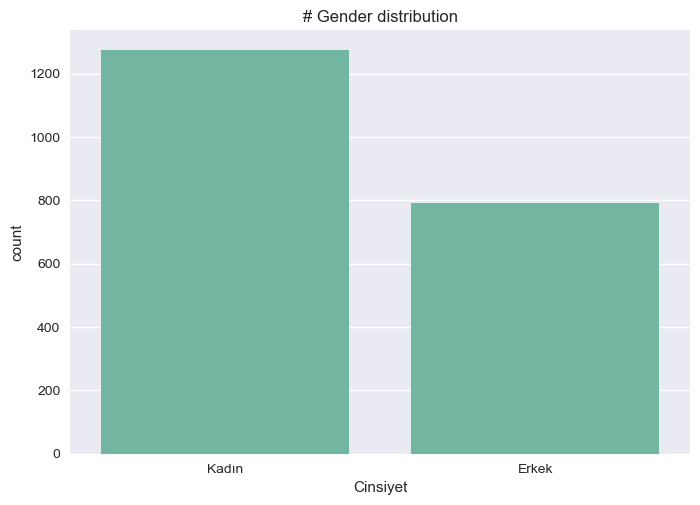

In [358]:
# Gender distribution
sns.countplot(data=df, x="Cinsiyet")
plt.title("# Gender distribution")
plt.show()

In [359]:
# Average treatment duration by department
df.groupby("Bolum")["TedaviSuresi_num"].mean().sort_values(ascending=False)

Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    15.136430
Göğüs Hastalıkları                                13.125000
Kardiyoloji                                       11.363636
Kalp Ve Damar Cerrahisi                           11.000000
Nöroloji                                          10.000000
Laboratuar                                         9.857143
Genel Cerrahi                                      9.833333
İç Hastalıkları                                    9.437500
Tıbbi Onkoloji                                     9.000000
Ortopedi Ve Travmatoloji                           4.818182
Name: TedaviSuresi_num, dtype: float64

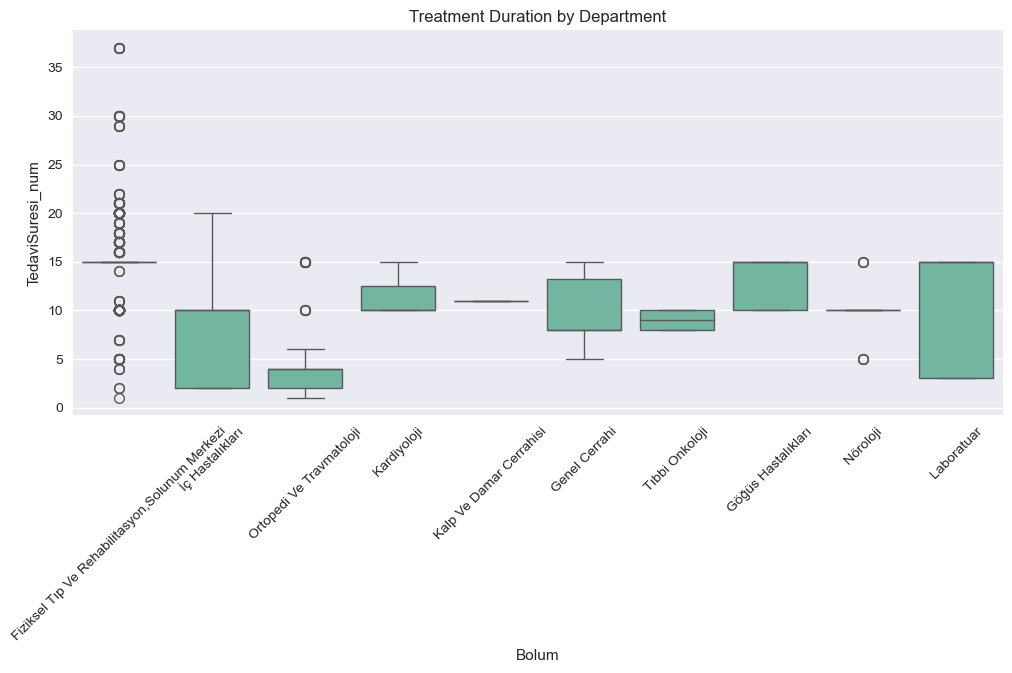

In [360]:
# Treatment duration by department
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Bolum", y="TedaviSuresi_num")
plt.xticks(rotation=45)
plt.title("Treatment Duration by Department")
plt.show()

In [361]:
# Treatment duration by gender
df.groupby("Cinsiyet")["TedaviSuresi_num"].describe()

,count,mean,std,min,25%,50%,75%,max
Cinsiyet,,,,,,,,
Erkek,792.0,14.406566,3.717095,1.0,15.0,15.0,15.0,29.0
Kadın,1274.0,14.771586,3.772449,1.0,15.0,15.0,15.0,37.0


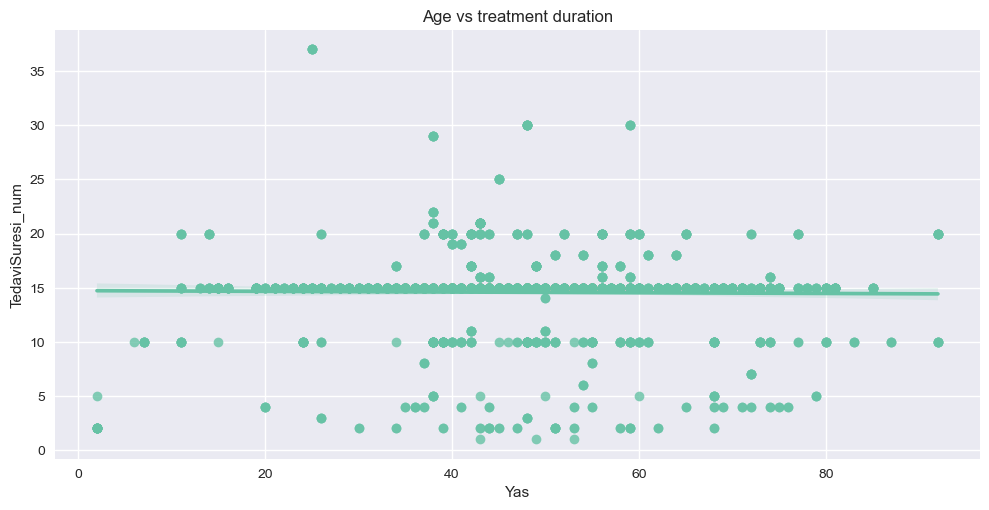

In [362]:
# Age vs treatment duration
sns.lmplot(data=df, x="Yas", y="TedaviSuresi_num", aspect=2, height=5)
plt.title("Age vs treatment duration")
plt.show()

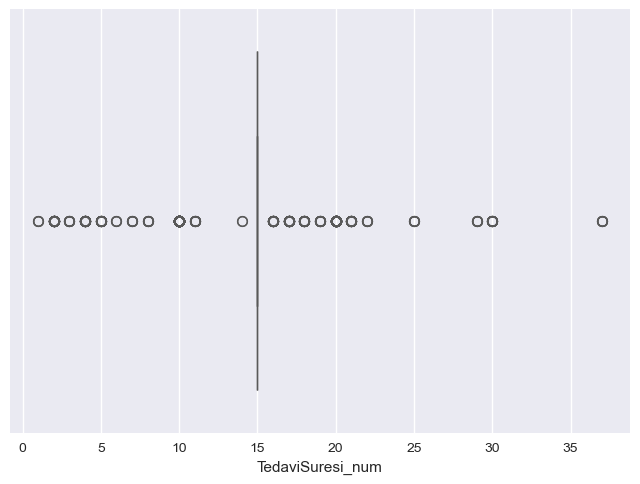

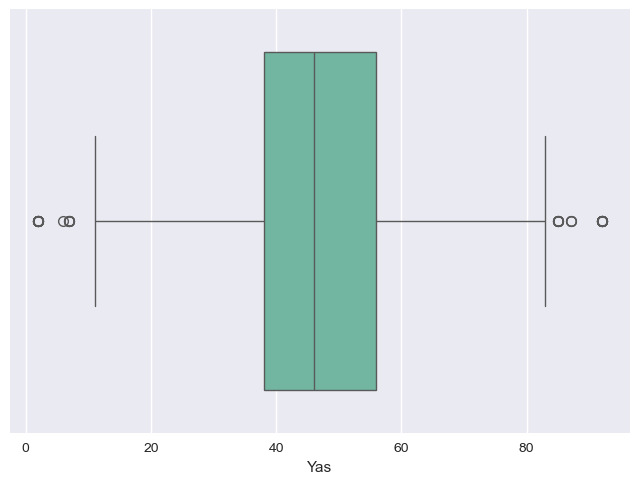

In [363]:
# Boxplot for outlier detection
sns.boxplot(x=df["TedaviSuresi_num"])
plt.show()

sns.boxplot(x=df["Yas"])
plt.show()


In [364]:
# Top 10 most common diagnoses
df["Tanilar"].value_counts().head(10)

Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                 149
Omuzun darbe sendromu                              128
İntervertebral disk bozuklukları, tanımlanmamış    116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE               96
Eklem ağrısı                                        51
DORSALJİ, DİĞER, SERVİKAL BÖLGE                     49
Radikülopati                                        37
Dorsalji, tanımlanmamış                             32
Menisküs yırtığı, şimdiki                           30
Ortopedik eklem implantı                            29
Name: count, dtype: int64

In [365]:
# Top 10 most common chronic diseases
df["KronikHastalik"].value_counts().head(10)

KronikHastalik
Myastenia gravis                        38
Aritmi                                  36
Fascioscapulohumeral Distrofi           36
Hipertiroidizm                          34
Limb-Girdle Musküler Distrofi, Astım    34
Kalp yetmezliği                         33
Hipertansiyon                           31
Astım                                   30
Becker Musküler Distrofisi              29
Limb-Girdle Musküler Distrofi           28
Name: count, dtype: int64

In [366]:
# Impute missing categorical values
from sklearn.impute import SimpleImputer

# Select categorical columns
cat_cols = ["Cinsiyet", "KanGrubu", "KronikHastalik", "Bolum", "Alerji", "Tanilar", "UygulamaYerleri"]

# Fill missing categorical values with "Missing"
imputer_cat = SimpleImputer(strategy="constant", fill_value="Missing")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Check missing values after imputation
df[cat_cols].isnull().sum()

Cinsiyet           0
KanGrubu           0
KronikHastalik     0
Bolum              0
Alerji             0
Tanilar            0
UygulamaYerleri    0
dtype: int64

In [367]:
# Drop duplicate rows based on key columns
df = df.drop_duplicates(subset=["HastaNo", "TedaviAdi", "UygulamaYerleri", "UygulamaSuresi"])
print("New shape:", df.shape)

New shape: (1175, 15)


In [368]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler

num_cols = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_num,UygulamaSuresi_num
0,145134,0.831408,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,-2.150290,0.842893
1,145135,-1.232020,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Missing,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,0.206824,0.842893
2,145135,-1.232020,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Missing,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,0.206824,0.842893
3,145135,-1.232020,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Missing,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika,0.206824,-1.188279
6,145136,0.831408,Erkek,0 Rh+,Türkiye,Missing,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,Missing,30 Dakika,-0.971733,2.197007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,0.057622,Erkek,Missing,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika,0.206824,0.842893
2230,145536,0.057622,Erkek,Missing,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika,0.206824,-0.511221
2232,145537,-0.909609,Kadın,A Rh+,Türkiye,Missing,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika,0.206824,0.842893
2233,145537,-0.909609,Kadın,A Rh+,Türkiye,Missing,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika,0.206824,0.165836


In [369]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to preserve original
df_label = df.copy()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col])

# Combine numerical and encoded categorical columns
df_final = df_label[num_cols + cat_cols]
df_final.head()

,Yas,TedaviSuresi_num,UygulamaSuresi_num,Cinsiyet,KanGrubu,KronikHastalik,Bolum,Alerji,Tanilar,UygulamaYerleri
0,0.831408,-2.150290,0.842893,1,0,52,0,24,15,0
1,-1.232020,0.206824,0.842893,0,0,82,0,3,215,3
2,-1.232020,0.206824,0.842893,0,0,82,0,3,215,6
3,-1.232020,0.206824,-1.188279,0,0,82,0,3,215,3
6,0.831408,-0.971733,2.197007,0,0,185,0,11,226,11
